# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

This work is Part of Udacity nanodegree: Self Driving ar Engineer. This this project I have developed a Traffic Sign Classifier using Deep learning and convolutional neural networks.It is advisable to use AWS, Udacity Classroom for using GPU instances but I have worked on my local machine that has NVIDIA 1080 GPU. The model is trained using  German Traffic Sign Dataset and I have tested 5 random images from internet.

### Build a Traffic Sign Recognition Project

The goals / steps of this project are the following:

    Load the data set (see below for links to the project data set)
    Explore, summarize and visualize the data set
    Design, train and test a model architecture
    Use the model to make predictions on new images
    Analyze the softmax probabilities of the new images
    Summarize the results with a written report


###  The outline of this Project:

0. Load The Data
1. Dataset Summary & Exploration
2. Design and Test a Model Architecture
3. Test a Model on New/Random Images


---
## Step 0: Load The Data

In [2]:
# Load pickled data, was provided by Udacity and could be available online
import pickle

# I usually keep the files/folders in a variables, easier to use later as you need.

training_file = "../data/train.p"
validation_file= "../data/valid.p"
testing_file = "../data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']
print("Loaded files: ( ",training_file,",",validation_file,",",testing_file,")")
print("Files Loaded, Good to go now!!")

Loaded files: (  ../data/train.p , ../data/valid.p , ../data/test.p )
Files Loaded, Good to go now!!


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
## Lets use pandas here and also load the csv file for later use for visulization purposes.

import csv
import pandas as pd

labels = []

#Select and load csv

with open('signnames.csv', 'r') as csvfile:
    readCSV = csv.reader(csvfile, delimiter=',')
    next(readCSV, None) # skip header
    for row in readCSV:
        labels += [row[1]]
        
sign_names = pd.read_csv('./signnames.csv')
sign_names.set_index('ClassId',inplace=True)

# Helper function: get_label(): transofrm a numeric label into the corresponding strring
def get_label(label):
    return sign_names.loc[label].SignName

# Number of training examples
n_train = len(X_train)

# Number of validation examples
n_validation = len(X_valid)

# Number of testing examples.
n_test = len(X_test)

# What's the shape of an traffic sign image?
image_shape = X_train[0].shape
img_size=X_train.shape[1]

# How many unique classes/labels there are in the dataset.
n_classes = len(labels)

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset
Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

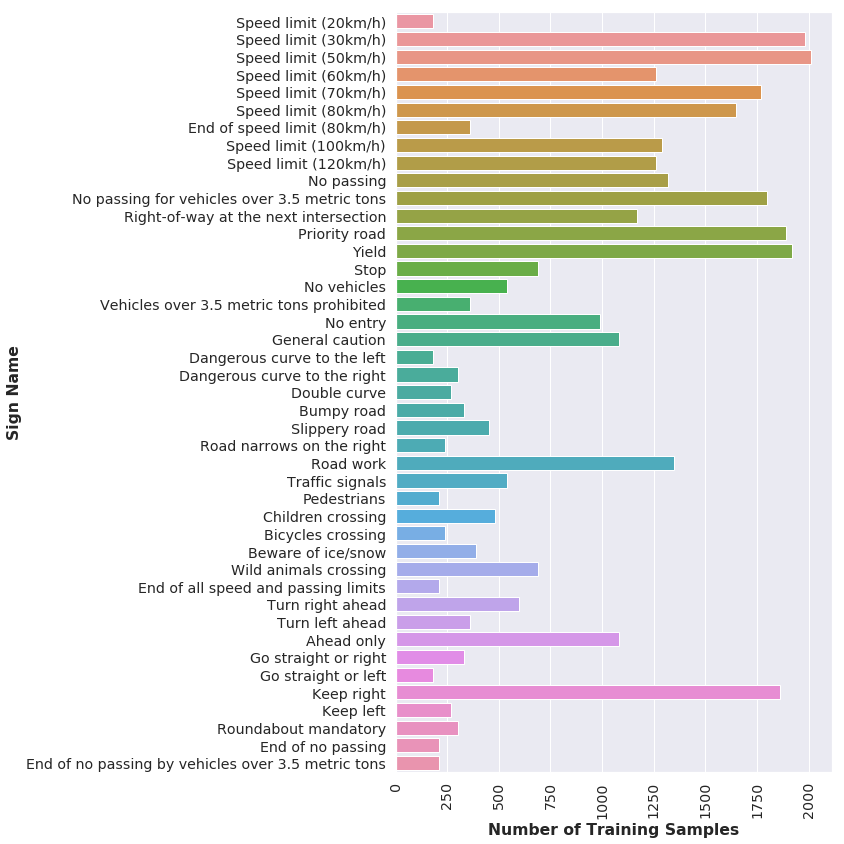

In [4]:
### Data exploration visualization code goes here.

import matplotlib.pyplot as plt
plt.rcdefaults()
import numpy as np
import pandas as pd
import random
from itertools import groupby
import seaborn as sns
from collections import Counter
%matplotlib inline

# Helper Function: get_label():transofrm a numeric label into the corresponding strring
def get_label(label):
    
    return sign_names.loc[label].SignName

counter = Counter(y_train)

### Show images with it label.
counts = pd.DataFrame(columns=['sign_label','training_samples_count'],data=[(label, count) for label, count in counter.items()])
counts['sign'] = counts.sign_label.apply(get_label)

plt.figure(figsize=(12,12))
sns.set(font_scale=1.3)
sns.barplot(x='training_samples_count',y='sign',data=counts,orient='o')
plt.xticks(rotation=90)
plt.ylabel('Sign Name',fontweight='bold')
plt.xlabel('Number of Training Samples',fontweight='bold');
plt.tight_layout()
plt.savefig('output_img/dataset_visualization.png')

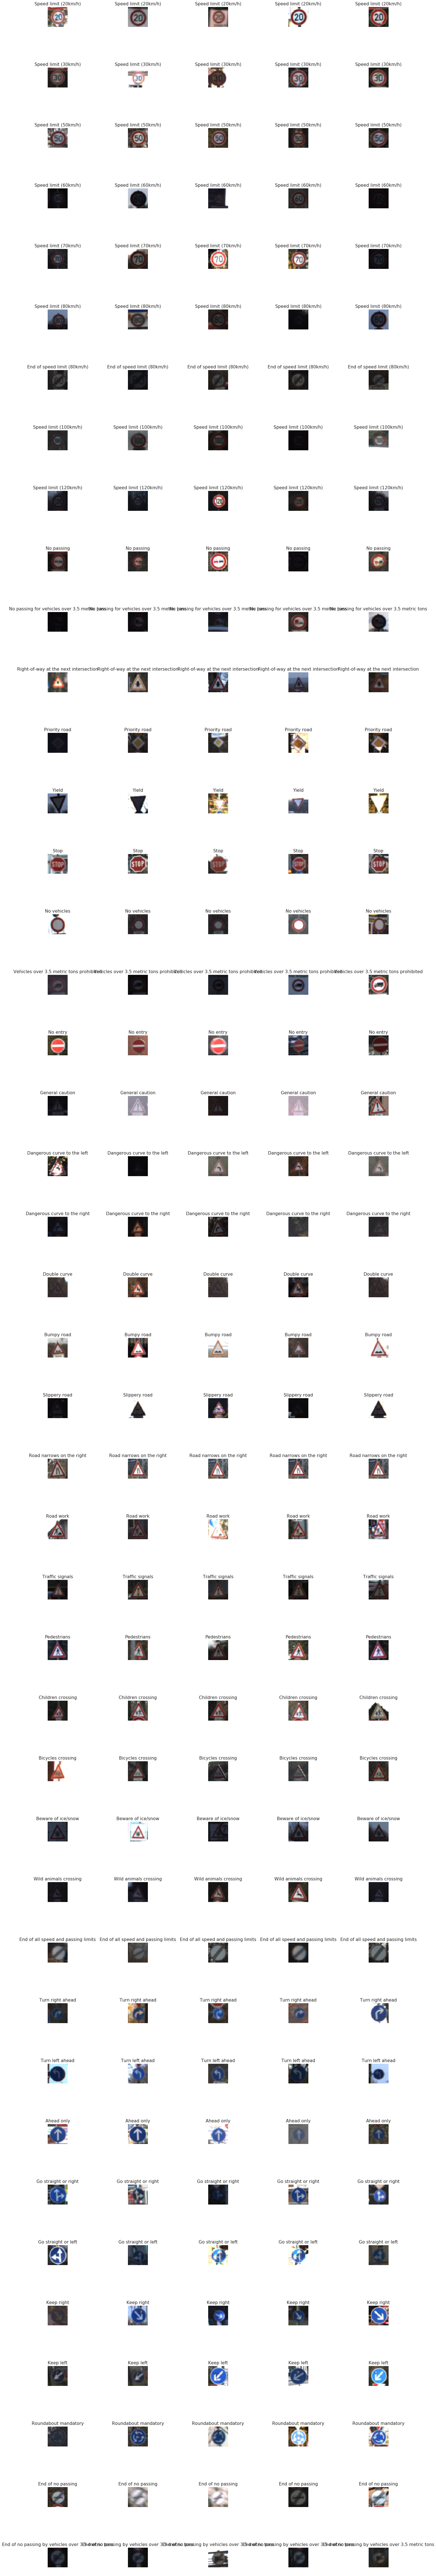

In [5]:
## Random set of Images for each class

index = 1
columns = 5

fig = plt.figure(figsize=(columns * 4, n_classes * 3))

for c in range(n_classes):  # Iterate all classes
    idx = np.where(y_train == c)  # Find index for class
    images = X_train[np.random.choice(idx[0], columns)]  # Pick five images to display
    for img in images:
        fig.add_subplot(n_classes, columns, index)
        index = index + 1
        plt.title(labels[c])
        plt.axis('off')
        plt.imshow(img)

plt.tight_layout()
plt.savefig('output_img/training_images.png')
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [Udacity classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.
Here I have kepts it simple by using multiple cells and doing it one by one to work/understand easily.

In [6]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [7]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

def img_normalize(data):
    return data / 255 * 0.8 + 0.1

X_train = img_normalize(X_train) 
X_test = img_normalize(X_test) 
X_valid = img_normalize(X_valid)

### Model Architecture

In [8]:
### This will be the Lenet model's defination and number of EPOCHS, Batch Size, etc.,

import tensorflow as tf

EPOCHS = 30
BATCH_SIZE = 128
keep_prob = 0.9

from tensorflow.contrib.layers import flatten

def Lenet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # L-1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # Activation.
    conv1 = tf.nn.relu(conv1)

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID', name='convolution1')

    # L-2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # Activation.
    conv2 = tf.nn.relu(conv2)

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID', name='convolution2')

    # Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # L-3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Activation.
    fc1    = tf.nn.relu(fc1)

    # L-4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # Activation.
    fc2    = tf.nn.relu(fc2)
    
    # apply DropOut to L-4
    drop_out = tf.nn.dropout(fc2, keep_prob)  # DROP-OUT here

    # L-5: Fully Connected. Input = 84. Output = 10.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, n_classes), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(n_classes))
    logits = tf.matmul(drop_out, fc3_W) + fc3_b
    
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

### Features and Labels

In [9]:
### Declare Features and Labels

x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
x_final_test = tf.placeholder(tf.float32, (None, 32, 32, 3))
x_final_graph = tf.placeholder(tf.float32, (None, 32, 32, 3))
one_hot_y = tf.one_hot(y, n_classes)

### Training Pipeline

In [10]:
rate = 0.001

logits = Lenet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)
# You might get a warning about softmax_cross_entropy_with_logits 
#(contd..)  being removed from tensorflow future versions(I didn't have to worry about it the moment I was coding)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



### Model Evaluation

In [11]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()
# Helper Function: evaluate_model(): evaluates data for processing in upcoming cells, including validation, test and training accuracies.
def evaluate_model(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Train, Validate and Test the Model

In [12]:
# Lets train the model and record the time taken for training.

import os
import time
total_time = time.time()
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    last_validation_accuracy1 = 0
    last_validation_accuracy2 = 0
    last_validation_accuracy3 = 0
    lesser_accuracy_count = 0
    
    print("Training Model...")
    print()
    for i in range(EPOCHS):
        #X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            start_time = time.time()
            
        validation_accuracy = evaluate_model(X_validation, y_validation)
        training_accuracy = evaluate_model(X_train, y_train)
        test_accuracy = evaluate_model(X_test, y_test)
        
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print("training Accuracy = {:.3f}".format(training_accuracy))
        print("test Accuracy = {:.3f}".format(test_accuracy))
        print(round(time.time() - start_time,3),'s')
        print()
        
        last_validation_accuracy_avg = (last_validation_accuracy1+last_validation_accuracy2+last_validation_accuracy3)/3
        print("Validation Accuracy average = {:.3f}".format(last_validation_accuracy_avg))
        
        if (validation_accuracy < last_validation_accuracy_avg):
            lesser_accuracy_count = lesser_accuracy_count + 1
            # If new validation accuracy is less than avg of last 3 values consecutively twice, stop training
            if (lesser_accuracy_count >= 2):
                break
        else:
            lesser_accuracy_count = 0
        
        last_validation_accuracy1 = last_validation_accuracy2
        last_validation_accuracy2 = last_validation_accuracy3
        last_validation_accuracy3 = validation_accuracy
        
    saver.save(sess, './lenet_PV')
    print("Model saved at: ", os.getcwd())
    print('Total time taken: ',round(time.time() - total_time,3))

Training Model...

EPOCH 1 ...
Validation Accuracy = 0.496
training Accuracy = 0.532
test Accuracy = 0.473
0.956 s

Validation Accuracy average = 0.000
EPOCH 2 ...
Validation Accuracy = 0.707
training Accuracy = 0.747
test Accuracy = 0.670
0.768 s

Validation Accuracy average = 0.165
EPOCH 3 ...
Validation Accuracy = 0.778
training Accuracy = 0.853
test Accuracy = 0.766
0.777 s

Validation Accuracy average = 0.401
EPOCH 4 ...
Validation Accuracy = 0.835
training Accuracy = 0.885
test Accuracy = 0.794
0.746 s

Validation Accuracy average = 0.660
EPOCH 5 ...
Validation Accuracy = 0.869
training Accuracy = 0.904
test Accuracy = 0.804
0.774 s

Validation Accuracy average = 0.773
EPOCH 6 ...
Validation Accuracy = 0.888
training Accuracy = 0.927
test Accuracy = 0.830
0.757 s

Validation Accuracy average = 0.827
EPOCH 7 ...
Validation Accuracy = 0.874
training Accuracy = 0.923
test Accuracy = 0.816
0.777 s

Validation Accuracy average = 0.864
EPOCH 8 ...
Validation Accuracy = 0.917
training A

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

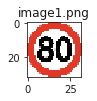

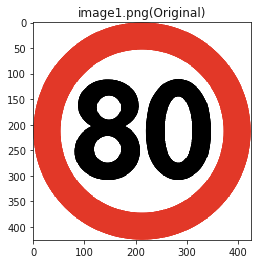

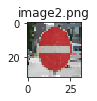

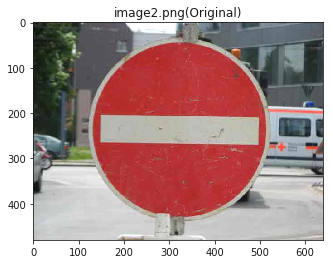

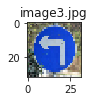

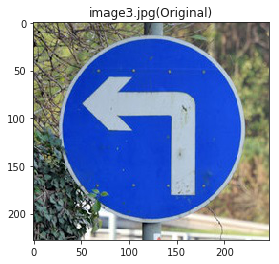

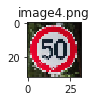

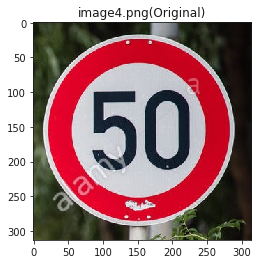

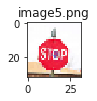

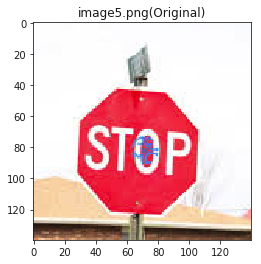

In [13]:
### Load the images(Downloaded from internet) and plot them here.

import matplotlib.pyplot as plt
plt.rcdefaults()
import matplotlib.image as mpimg
import numpy as np
import os
import cv2
%matplotlib inline

x_test = []
X_name = []

def test_pipeline(img):
    global x_test
    
    #Resize for consistency
    resize_image = cv2.resize(img, (32, 32))
    
    #Convert to 3 channels
    processed_img = cv2.cvtColor(resize_image, cv2.COLOR_BGRA2BGR) 
    
    x_test.append(processed_img)
    return resize_image

#printing out some stats and plotting
plt.close("all")
for file in sorted(os.listdir("test_img/")):
    plt.figure(figsize=(1,1))
    plt.title(file)
    plt.imshow(test_pipeline(mpimg.imread('test_img/' + file)))    
    plt.figure()
    plt.title(file + "(Original)")
    plt.imshow(mpimg.imread('test_img/' + file))
    X_name += [file]     
    
X_final_graph = x_test

### Predict the Sign Type for Each Image

In [14]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    predicted_logits = sess.run(logits, feed_dict={x: x_test})
    predicted_labels = np.argmax(predicted_logits, axis=1)
    for i in range(len(X_name)):
        print("{0} - Prediction: {1}".format(X_name[i],labels[predicted_labels[i]]))

INFO:tensorflow:Restoring parameters from ./lenet_PV
image1.png - Prediction: Speed limit (30km/h)
image2.png - Prediction: No entry
image3.jpg - Prediction: Turn left ahead
image4.png - Prediction: Speed limit (30km/h)
image5.png - Prediction: Stop


### Analyze Performance

In [15]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    y_final_test = [5, 17, 34, 2, 14]
    test_accuracy = evaluate_model(x_test, y_final_test)
    #print(test_accuracy)
    print("Test Accuracy = {:.0f}%".format(test_accuracy*100))

INFO:tensorflow:Restoring parameters from ./lenet_PV
Test Accuracy = 60%


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [16]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 

with tf.Session() as sess:
    softmax = tf.nn.softmax(predicted_logits)
    top5 = sess.run(tf.nn.top_k(softmax, k=5))
    for x in range(len(X_name)):
        print("{0}:".format(X_name[x]))
        for y in range(5):
            print("{:s}: {:.2f}%".format(labels[top5[1][x][y]], top5[0][x][y]*100))
        print()

image1.png:
Speed limit (30km/h): 99.21%
Speed limit (50km/h): 0.79%
Go straight or right: 0.00%
End of no passing: 0.00%
End of all speed and passing limits: 0.00%

image2.png:
No entry: 100.00%
Stop: 0.00%
Bicycles crossing: 0.00%
General caution: 0.00%
Yield: 0.00%

image3.jpg:
Turn left ahead: 100.00%
Speed limit (20km/h): 0.00%
Speed limit (30km/h): 0.00%
Speed limit (50km/h): 0.00%
Speed limit (60km/h): 0.00%

image4.png:
Speed limit (30km/h): 100.00%
Speed limit (50km/h): 0.00%
Right-of-way at the next intersection: 0.00%
Speed limit (80km/h): 0.00%
End of speed limit (80km/h): 0.00%

image5.png:
Stop: 100.00%
No entry: 0.00%
Bicycles crossing: 0.00%
No vehicles: 0.00%
Speed limit (30km/h): 0.00%



For overview take a look at the readme file.